Attempting to use base dataset path: /kaggle/input/oasis-1
Successfully located base dataset path: /kaggle/input/oasis-1
Contents of '/kaggle/input/oasis-1': ['oasis_cross-sectional_disc6', 'oasis_cross-sectional_disc12', 'oasis_cross-sectional_disc4', 'oasis_cross-sectional_disc8', 'oasis_cross-sectional_disc9', 'oasis_cross-sectional_disc11', 'oasis_cross-sectional_disc5', 'oasis_cross-sectional_disc3', 'oasis_cross-sectional_disc1', 'oasis_cross-sectional_disc2', 'oasis_cross-sectional_disc10', 'oasis_cross-sectional_disc7']

Found 12 'oasis_cross-sectional_discX' folders: ['oasis_cross-sectional_disc6', 'oasis_cross-sectional_disc12', 'oasis_cross-sectional_disc4', 'oasis_cross-sectional_disc8', 'oasis_cross-sectional_disc9', 'oasis_cross-sectional_disc11', 'oasis_cross-sectional_disc5', 'oasis_cross-sectional_disc3', 'oasis_cross-sectional_disc1', 'oasis_cross-sectional_disc2', 'oasis_cross-sectional_disc10', 'oasis_cross-sectional_disc7']

Processing Disc Parent Folder: /kaggle/i

very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine



--- SUMMARY ---
Found 434 potential ground truth images in total.
First few example paths found:
  /kaggle/input/oasis-1/oasis_cross-sectional_disc6/disc6/OAS1_0220_MR1/PROCESSED/MPRAGE/SUBJ_111/OAS1_0220_MR1_mpr_n4_anon_sbj_111.img
  /kaggle/input/oasis-1/oasis_cross-sectional_disc6/disc6/OAS1_0230_MR2/PROCESSED/MPRAGE/SUBJ_111/OAS1_0230_MR2_mpr_n4_anon_sbj_111.img
  /kaggle/input/oasis-1/oasis_cross-sectional_disc6/disc6/OAS1_0224_MR1/PROCESSED/MPRAGE/SUBJ_111/OAS1_0224_MR1_mpr_n4_anon_sbj_111.img
  /kaggle/input/oasis-1/oasis_cross-sectional_disc6/disc6/OAS1_0212_MR1/PROCESSED/MPRAGE/SUBJ_111/OAS1_0212_MR1_mpr_n4_anon_sbj_111.img
  /kaggle/input/oasis-1/oasis_cross-sectional_disc6/disc6/OAS1_0227_MR1/PROCESSED/MPRAGE/SUBJ_111/OAS1_0227_MR1_mpr_n4_anon_sbj_111.img

--- Loading a sample image ---
Loading: /kaggle/input/oasis-1/oasis_cross-sectional_disc6/disc6/OAS1_0220_MR1/PROCESSED/MPRAGE/SUBJ_111/OAS1_0220_MR1_mpr_n4_anon_sbj_111.img
  Image shape: (256, 256, 160, 1), Data type: f

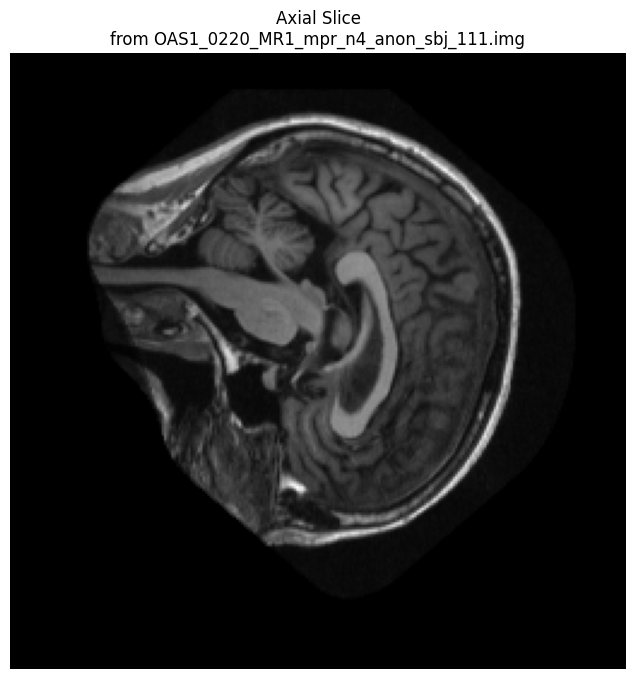


Selected 2D slice for CS (shape (256, 256), range [0.00, 1.00])

--- Starting CS Simulation ---

Testing Cartesian Mask (R=4)
Starting ISTA: iterations=10, lambda=0.0001, wavelet=db4, level=3
ISTA Iteration 1/10, Current PSNR: 26.3584 dB
ISTA Iteration 2/10, Current PSNR: 26.6080 dB
ISTA Iteration 3/10, Current PSNR: 26.6988 dB
ISTA Iteration 4/10, Current PSNR: 26.7348 dB
ISTA Iteration 5/10, Current PSNR: 26.7504 dB
ISTA Iteration 6/10, Current PSNR: 26.7576 dB
ISTA Iteration 7/10, Current PSNR: 26.7611 dB
ISTA Iteration 8/10, Current PSNR: 26.7627 dB
ISTA Iteration 9/10, Current PSNR: 26.7636 dB
ISTA Iteration 10/10, Current PSNR: 26.7640 dB
Cartesian Mask: ZF PSNR=25.12, ISTA PSNR=26.76, ZF SSIM=0.6020, ISTA SSIM=0.7169, Time=0.13s

Testing Random 2D Mask (R=4)
Starting ISTA: iterations=10, lambda=0.0001, wavelet=db4, level=3
ISTA Iteration 1/10, Current PSNR: 25.3668 dB
ISTA Iteration 2/10, Current PSNR: 25.7689 dB
ISTA Iteration 3/10, Current PSNR: 25.9207 dB
ISTA Iteration 4/10

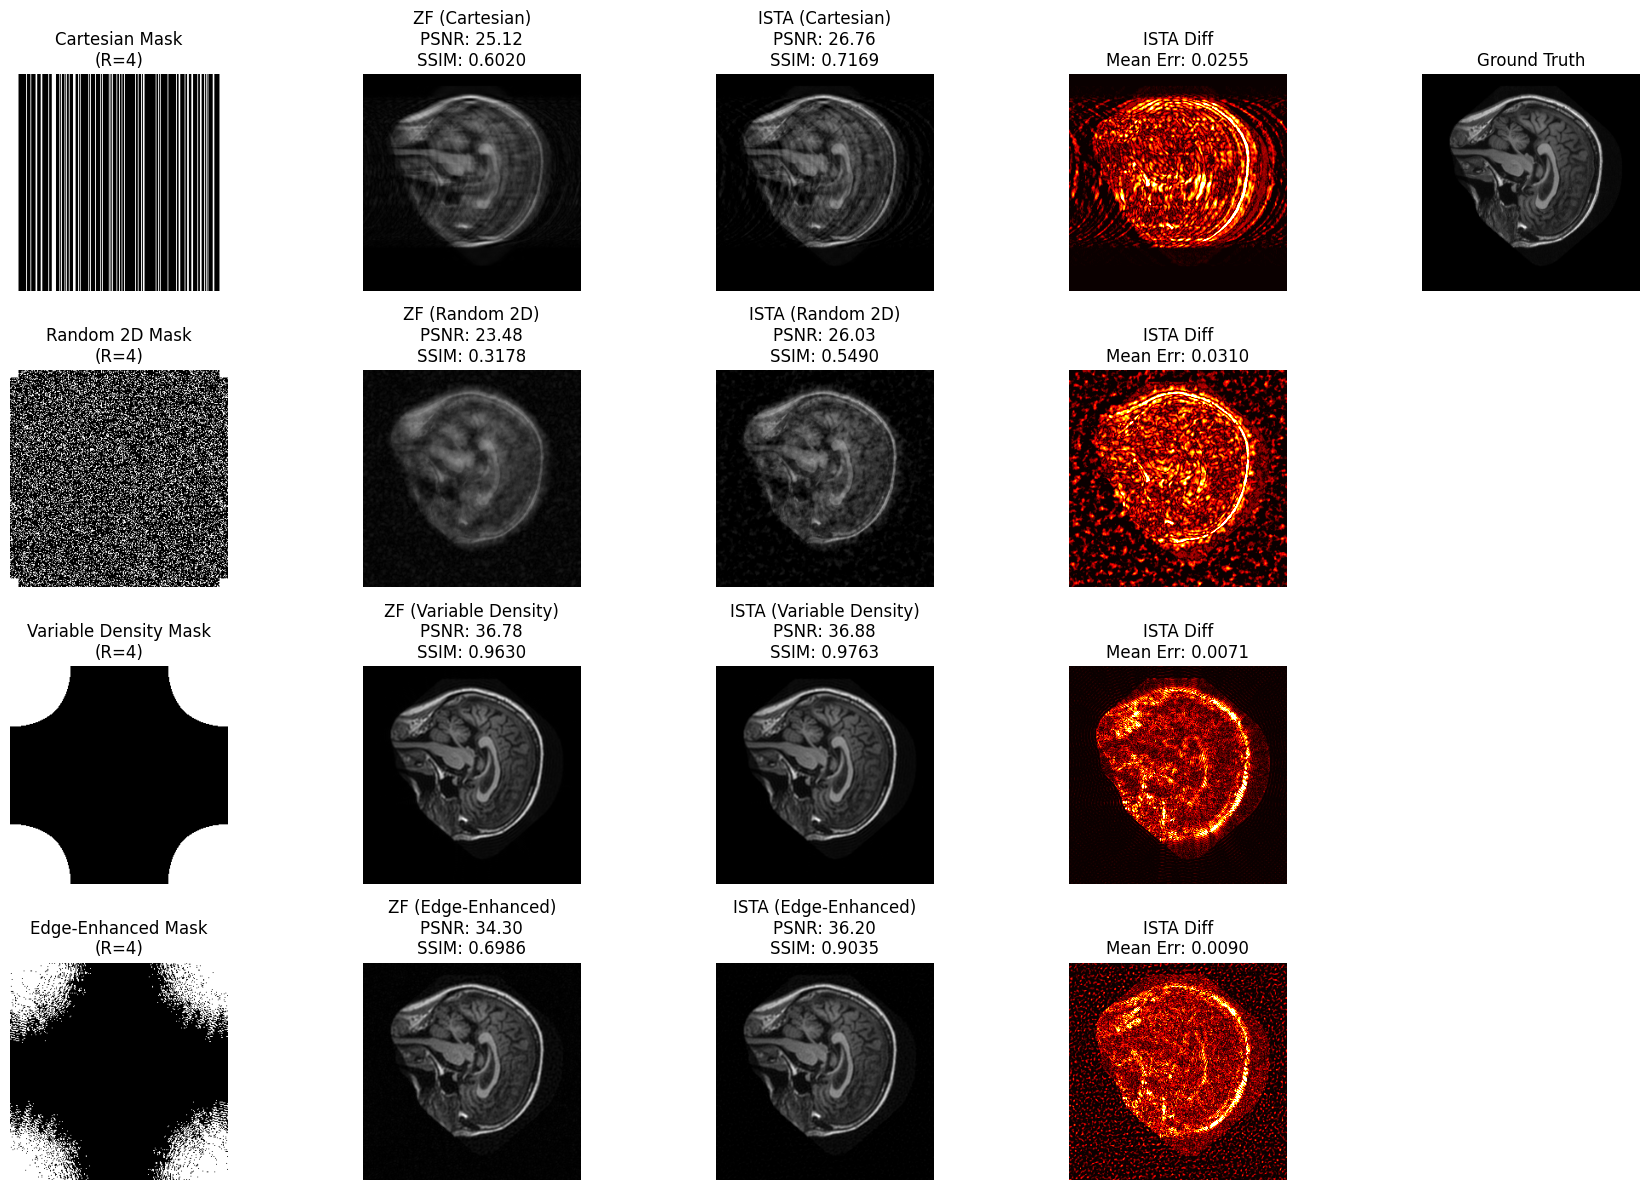


--- Summary of Results (R=4) ---
Mask            | ZF PSNR    | ISTA PSNR  | ZF SSIM    | ISTA SSIM  | Time (s)  
----------------------------------------------------------------------
Cartesian       | 25.12      | 26.76      | 0.6020     | 0.7169     | 0.13      
Random 2D       | 23.48      | 26.03      | 0.3178     | 0.5490     | 0.20      
Variable Density | 36.78      | 36.88      | 0.9630     | 0.9763     | 0.12      
Edge-Enhanced   | 34.30      | 36.20      | 0.6986     | 0.9035     | 0.12      

--- Comparison to Reference Paper ---
Paper's Edge-Enhanced (R=4, 25% data): PSNR=33.52 dB, SSIM=0.4206 (TV algorithm)
Paper's Edge-Enhanced (R=2, 50% data): PSNR=34.76 dB, SSIM=0.4008 (TV algorithm)
Your Best (Variable Density, R=4, 25% data): PSNR=36.88 dB, SSIM=0.9763 (ISTA)

--- Experiments Complete ---


In [1]:
import os
import glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pywt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.filters import sobel
import time

# --- 1. DEFINE BASE PATHS ---
base_kaggle_input_path = '/kaggle/input/'
dataset_name = 'oasis-1'
base_dataset_path = os.path.join(base_kaggle_input_path, dataset_name)
print(f"Attempting to use base dataset path: {base_dataset_path}")

if not os.path.isdir(base_dataset_path):
    print(f"ERROR: Base dataset path does not exist: {base_dataset_path}")
    print(f"Listing contents of '{base_kaggle_input_path}': {os.listdir(base_kaggle_input_path)}")
    exit()

print(f"Successfully located base dataset path: {base_dataset_path}")
print(f"Contents of '{base_dataset_path}': {os.listdir(base_dataset_path)}")

image_paths = []

# --- 2. FIND CROSS-SECTIONAL DISC PARENT FOLDERS ---
disc_parent_folders_names = [
    d for d in os.listdir(base_dataset_path)
    if d.startswith('oasis_cross-sectional_disc') and \
       os.path.isdir(os.path.join(base_dataset_path, d))
]
print(f"\nFound {len(disc_parent_folders_names)} 'oasis_cross-sectional_discX' folders: {disc_parent_folders_names}")

if not disc_parent_folders_names:
    print(f"ERROR: No 'oasis_cross-sectional_discX' folders found under '{base_dataset_path}'.")
    exit()

# --- 3. ITERATE THROUGH EACH DISC PARENT FOLDER ---
for disc_parent_name in disc_parent_folders_names:
    current_disc_parent_path = os.path.join(base_dataset_path, disc_parent_name)
    print(f"\nProcessing Disc Parent Folder: {current_disc_parent_path}")

    disc_num_str = disc_parent_name.replace('oasis_cross-sectional_disc', '')
    inner_disc_folder_name = f'disc{disc_num_str}'
    subjects_parent_path = os.path.join(current_disc_parent_path, inner_disc_folder_name)
    print(f"  Looking for subject folders within: {subjects_parent_path}")

    if not os.path.isdir(subjects_parent_path):
        print(f"  WARNING: Expected inner disc folder '{subjects_parent_path}' not found.")
        print(f"  Contents of '{current_disc_parent_path}': {os.listdir(current_disc_parent_path)}")
        continue
    
    print(f"  Found inner disc folder: {subjects_parent_path}")

    subject_folder_glob_pattern = os.path.join(subjects_parent_path, 'OAS1_*_MR*')
    subject_folders_found = glob.glob(subject_folder_glob_pattern)
    print(f"  Found {len(subject_folders_found)} subject folders using pattern '{subject_folder_glob_pattern}'.")

    if not subject_folders_found:
        print(f"  WARNING: No subject folders found in '{subjects_parent_path}'.")
        continue

    for subj_folder_path in subject_folders_found:
        subject_id_from_folder = os.path.basename(subj_folder_path)
        image_file_path_pattern = os.path.join(
            subj_folder_path, 'PROCESSED', 'MPRAGE', 'SUBJ_111',
            f'{subject_id_from_folder}_mpr_n*_anon_sbj_111.img'
        )
        found_img_files = glob.glob(image_file_path_pattern)

        if not found_img_files:
            image_file_path_pattern_alt = os.path.join(
                subj_folder_path, 'PROCESSED', 'MPRAGE', 'SUBJ_111',
                f'{subject_id_from_folder}_mpr_*_anon_sbj_111.img'
            )
            found_img_files = glob.glob(image_file_path_pattern_alt)
        
        if found_img_files:
            image_paths.append(found_img_files[0])

# --- 4. FINAL REPORT ---
print(f"\n--- SUMMARY ---")
print(f"Found {len(image_paths)} potential ground truth images in total.")

if image_paths:
    print(f"First few example paths found:")
    for p in image_paths[:min(5, len(image_paths))]:
        print(f"  {p}")
else:
    print("No images found. Please check dataset structure and file names.")
    exit()

# --- 5. LOAD AND DISPLAY A SAMPLE IMAGE ---
print("\n--- Loading a sample image ---")
sample_img_path = image_paths[0]
print(f"Loading: {sample_img_path}")
try:
    img_obj = nib.load(sample_img_path)
    img_data = img_obj.get_fdata()
    print(f"  Image shape: {img_data.shape}, Data type: {img_data.dtype}, Min: {np.min(img_data):.2f}, Max: {np.max(img_data):.2f}")

    if img_data.ndim == 4 and img_data.shape[3] == 1:
        central_slice_idx_ax = img_data.shape[2] // 2
        slice_2d = img_data[:, :, central_slice_idx_ax, 0].astype(np.float32).copy()

        plt.figure(figsize=(8, 8))
        plt.imshow(slice_2d, cmap='gray')
        plt.title(f"Axial Slice\nfrom {os.path.basename(sample_img_path)}")
        plt.axis('off')
        plt.show()

        ground_truth_image = slice_2d
        if np.max(ground_truth_image) > np.min(ground_truth_image):
            ground_truth_image = (ground_truth_image - np.min(ground_truth_image)) / \
                                 (np.max(ground_truth_image) - np.min(ground_truth_image))
        else:
            ground_truth_image = np.zeros_like(ground_truth_image)

        print(f"\nSelected 2D slice for CS (shape {ground_truth_image.shape}, "
              f"range [{np.min(ground_truth_image):.2f}, {np.max(ground_truth_image):.2f}])")

    else:
        print(f"  Loaded image is not 4D (shape: {img_data.shape}). Cannot select slice.")
        exit()

except Exception as e:
    print(f"  ERROR loading image '{sample_img_path}': {e}")
    import traceback
    traceback.print_exc()
    exit()

# --- 6. CS SIMULATION ---
if 'ground_truth_image' in locals():
    print("\n--- Starting CS Simulation ---")

    # Transform to k-space
    k_space_full = fftshift(fft2(ground_truth_image))

    # Define mask creation functions
    def create_cartesian_mask(shape, acceleration_factor, center_fraction=0.08):
        num_cols = shape[1]
        num_low_freqs = int(round(num_cols * center_fraction))
        mask = np.zeros(shape, dtype=bool)
        pad = (num_cols - num_low_freqs + 1) // 2
        mask[:, pad:pad + num_low_freqs] = True
        num_sampled_lines_outer = (num_cols - num_low_freqs) // acceleration_factor
        outer_lines_indices = np.setdiff1d(np.arange(num_cols), np.arange(pad, pad + num_low_freqs))
        permuted_outer_lines = np.random.permutation(outer_lines_indices)
        selected_outer_lines = permuted_outer_lines[:num_sampled_lines_outer]
        mask[:, selected_outer_lines] = True
        return mask

    def create_random_2d_mask(shape, acceleration_factor, center_fraction=0.08, seed=None):
        if seed is not None:
            np.random.seed(seed)
        num_points = int(np.prod(shape) / acceleration_factor)
        mask = np.zeros(shape, dtype=bool)
        center_rows = int(shape[0] * center_fraction)
        center_cols = int(shape[1] * center_fraction)
        r_start, r_end = shape[0]//2 - center_rows//2, shape[0]//2 + center_rows//2
        c_start, c_end = shape[1]//2 - center_cols//2, shape[1]//2 + center_cols//2
        mask[r_start:r_end, c_start:c_end] = True
        num_sampled_center = np.sum(mask)
        remaining_points = num_points - num_sampled_center
        if remaining_points > 0:
            outer_indices = [(r, c) for r in range(shape[0]) for c in range(shape[1])
                             if not (r_start <= r < r_end and c_start <= c < c_end)]
            if len(outer_indices) > 0:
                chosen_indices = np.random.choice(len(outer_indices), 
                                                 min(remaining_points, len(outer_indices)), 
                                                 replace=False)
                for idx in chosen_indices:
                    r, c = outer_indices[idx]
                    mask[r, c] = True
        return mask

    def create_variable_density_mask(shape, acceleration_factor, center_fraction=0.08, poly_degree=2, seed=None):
        if seed is not None:
            np.random.seed(seed)
        rows, cols = shape
        center_x, center_y = cols // 2, rows // 2
        x_coords = np.abs(np.arange(cols) - center_x)
        y_coords = np.abs(np.arange(rows) - center_y)
        dist_x, dist_y = np.meshgrid(x_coords, y_coords)
        norm_dist_x = dist_x / (np.max(dist_x) if np.max(dist_x) > 0 else 1)
        norm_dist_y = dist_y / (np.max(dist_y) if np.max(dist_y) > 0 else 1)
        pdf = (1 - norm_dist_x**poly_degree) * (1 - norm_dist_y**poly_degree)
        pdf = np.clip(pdf, 0, 1)
        target_samples = int(np.prod(shape) / acceleration_factor)
        flat_pdf = pdf.flatten()
        sorted_indices = np.argsort(-flat_pdf)
        mask = np.zeros(shape, dtype=bool).flatten()
        mask[sorted_indices[:target_samples]] = True
        mask = mask.reshape(shape)
        center_rows_abs = int(shape[0] * center_fraction)
        center_cols_abs = int(shape[1] * center_fraction)
        r_start, r_end = shape[0]//2 - center_rows_abs//2, shape[0]//2 + center_rows_abs//2
        c_start, c_end = shape[1]//2 - center_cols_abs//2, shape[1]//2 + center_cols_abs//2
        mask[r_start:r_end, c_start:c_end] = True
        actual_accel = np.prod(shape) / np.sum(mask)
        print(f"  Variable Density Mask: Target R={acceleration_factor}, Actual R={actual_accel:.2f}")
        return mask

    def create_edge_enhanced_mask(shape, acceleration_factor, reference_image, center_fraction=0.08, seed=None):
        """
        Create an edge-enhanced mask as per the reference paper.
        Uses Sobel edge detection on the reference image to prioritize k-space samples.
        """
        if seed is not None:
            np.random.seed(seed)
        
        # Step 1: Edge detection on reference image
        edge_map = sobel(reference_image)
        edge_map = np.clip(edge_map, 0, np.percentile(edge_map, 99))  # Avoid outliers
        if np.max(edge_map) > np.min(edge_map):
            edge_map = (edge_map - np.min(edge_map)) / (np.max(edge_map) - np.min(edge_map))
        
        # Step 2: Transform edge map to k-space
        k_space_edge = fftshift(fft2(edge_map))
        k_space_energy = np.abs(k_space_edge)
        k_space_energy = np.clip(k_space_energy, 0, np.percentile(k_space_energy, 99))
        if np.max(k_space_energy) > np.min(k_space_energy):
            k_space_energy = (k_space_energy - np.min(k_space_energy)) / \
                             (np.max(k_space_energy) - np.min(k_space_energy))
        
        # Step 3: Create PDF (combine edge energy with center-weighted component)
        rows, cols = shape
        center_x, center_y = cols // 2, rows // 2
        x_coords = np.abs(np.arange(cols) - center_x) / (cols / 2)
        y_coords = np.abs(np.arange(rows) - center_y) / (rows / 2)
        dist_x, dist_y = np.meshgrid(x_coords, y_coords)
        center_pdf = (1 - dist_x**2) * (1 - dist_y**2)  # Quadratic decay
        center_pdf = np.clip(center_pdf, 0, 1)
        
        # Combine edge and center PDFs (weighted sum)
        edge_weight = 0.7  # Paper suggests edge emphasis; adjust as needed
        pdf = edge_weight * k_space_energy + (1 - edge_weight) * center_pdf
        pdf = np.clip(pdf, 0, 1)
        
        # Step 4: Sample according to PDF
        target_samples = int(np.prod(shape) / acceleration_factor)
        flat_pdf = pdf.flatten()
        sorted_indices = np.argsort(-flat_pdf)
        mask = np.zeros(shape, dtype=bool).flatten()
        mask[sorted_indices[:target_samples]] = True
        mask = mask.reshape(shape)
        
        # Step 5: Ensure center is fully sampled
        center_rows_abs = int(shape[0] * center_fraction)
        center_cols_abs = int(shape[1] * center_fraction)
        r_start, r_end = shape[0]//2 - center_rows_abs//2, shape[0]//2 + center_rows_abs//2
        c_start, c_end = shape[1]//2 - center_cols_abs//2, shape[1]//2 + center_cols_abs//2
        mask[r_start:r_end, c_start:c_end] = True
        
        actual_accel = np.prod(shape) / np.sum(mask)
        print(f"  Edge-Enhanced Mask: Target R={acceleration_factor}, Actual R={actual_accel:.2f}")
        return mask

    # ISTA reconstruction function
    def soft_threshold(x, threshold):
        return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

    def wavelet_forward(image, wavelet='db4', level=3):
        coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
        arr, coeff_slices = pywt.coeffs_to_array(coeffs)
        return arr, coeff_slices

    def wavelet_inverse(arr, coeff_slices, wavelet='db4'):
        coeffs_from_arr = pywt.array_to_coeffs(arr, coeff_slices, output_format='wavedec2')
        return pywt.waverec2(coeffs_from_arr, wavelet=wavelet)

    def ista_wavelet_cs(k_space_undersampled, mask, initial_image, n_iters, lambda_val,
                        ground_truth_for_psnr, wavelet='db4', level=3):
        x_recon = initial_image.copy().astype(np.complex128)
        k_space_undersampled = k_space_undersampled.astype(np.complex128)
        step_size = 1.0

        print(f"Starting ISTA: iterations={n_iters}, lambda={lambda_val}, wavelet={wavelet}, level={level}")

        for i in range(n_iters):
            current_k_space = fftshift(fft2(x_recon))
            k_space_error = (current_k_space * mask) - k_space_undersampled
            grad_data_term = ifft2(ifftshift(k_space_error * mask))
            x_intermediate = x_recon - step_size * grad_data_term
            x_intermediate_real = np.real(x_intermediate)
            
            coeffs_arr, coeff_slices = wavelet_forward(x_intermediate_real, wavelet=wavelet, level=level)
            threshold = lambda_val * step_size
            coeffs_list_form = pywt.wavedec2(x_intermediate_real, wavelet=wavelet, level=level)
            approx_coeffs_size = coeffs_list_form[0].size
            coeffs_arr_thresh = coeffs_arr.copy()
            coeffs_arr_thresh[approx_coeffs_size:] = soft_threshold(coeffs_arr[approx_coeffs_size:], threshold)
            x_reconstructed_real = wavelet_inverse(coeffs_arr_thresh, coeff_slices, wavelet=wavelet)
            x_recon = x_reconstructed_real.astype(np.complex128)

            if (i + 1) % (n_iters // 10 or 1) == 0 or i == n_iters - 1:
                current_psnr = psnr(ground_truth_for_psnr, np.clip(np.real(x_recon), 0, 1), data_range=1.0)
                print(f"ISTA Iteration {i+1}/{n_iters}, Current PSNR: {current_psnr:.4f} dB")
        
        return np.clip(np.real(x_recon), 0, 1)

    # --- 7. TEST MASKS AT R=4 ---
    fixed_R = 4
    optimal_lambda = 0.0001
    optimal_iters = 10
    masks_to_test = [
        ('Cartesian', lambda shape, R: create_cartesian_mask(shape, R)),
        ('Random 2D', lambda shape, R: create_random_2d_mask(shape, R, seed=0)),
        ('Variable Density', lambda shape, R: create_variable_density_mask(shape, R, poly_degree=2, seed=0)),
        ('Edge-Enhanced', lambda shape, R: create_edge_enhanced_mask(shape, R, ground_truth_image, seed=0))
    ]

    results = []
    for mask_name, mask_func in masks_to_test:
        print(f"\nTesting {mask_name} Mask (R={fixed_R})")
        start_time = time.time()
        
        mask = mask_func(k_space_full.shape, fixed_R)
        k_space_undersampled = k_space_full * mask
        zf_recon = np.abs(ifft2(ifftshift(k_space_undersampled)))
        psnr_zf = psnr(ground_truth_image, zf_recon, data_range=1.0)
        ssim_zf = ssim(ground_truth_image, zf_recon, data_range=1.0, channel_axis=None)
        
        ista_recon = ista_wavelet_cs(
            k_space_undersampled, mask, zf_recon.copy(),
            n_iters=optimal_iters, lambda_val=optimal_lambda,
            ground_truth_for_psnr=ground_truth_image
        )
        psnr_ista = psnr(ground_truth_image, ista_recon, data_range=1.0)
        ssim_ista = ssim(ground_truth_image, ista_recon, data_range=1.0, channel_axis=None)
        
        results.append({
            'name': mask_name,
            'mask': mask,
            'zf_recon': zf_recon,
            'ista_recon': ista_recon,
            'psnr_zf': psnr_zf,
            'ssim_zf': ssim_zf,
            'psnr_ista': psnr_ista,
            'ssim_ista': ssim_ista,
            'time': time.time() - start_time
        })
        print(f"{mask_name} Mask: ZF PSNR={psnr_zf:.2f}, ISTA PSNR={psnr_ista:.2f}, "
              f"ZF SSIM={ssim_zf:.4f}, ISTA SSIM={ssim_ista:.4f}, Time={results[-1]['time']:.2f}s")

    # --- 8. VISUALIZE RESULTS ---
    plt.figure(figsize=(18, 12))
    for i, res in enumerate(results):
        # Mask
        plt.subplot(4, 5, i*5 + 1)
        plt.imshow(fftshift(res['mask']), cmap='gray')
        plt.title(f"{res['name']} Mask\n(R={fixed_R})")
        plt.axis('off')

        # Zero-Filled
        plt.subplot(4, 5, i*5 + 2)
        plt.imshow(res['zf_recon'], cmap='gray', vmin=0, vmax=1)
        plt.title(f"ZF ({res['name']})\nPSNR: {res['psnr_zf']:.2f}\nSSIM: {res['ssim_zf']:.4f}")
        plt.axis('off')
        
        # ISTA
        plt.subplot(4, 5, i*5 + 3)
        plt.imshow(res['ista_recon'], cmap='gray', vmin=0, vmax=1)
        plt.title(f"ISTA ({res['name']})\nPSNR: {res['psnr_ista']:.2f}\nSSIM: {res['ssim_ista']:.4f}")
        plt.axis('off')

        # Difference
        diff = np.abs(ground_truth_image - res['ista_recon'])
        plt.subplot(4, 5, i*5 + 4)
        plt.imshow(diff, cmap='hot', vmin=0, vmax=np.percentile(diff, 99))
        plt.title(f"ISTA Diff\nMean Err: {np.mean(diff):.4f}")
        plt.axis('off')

        # Ground Truth (only once, in first row)
        if i == 0:
            plt.subplot(4, 5, 5)
            plt.imshow(ground_truth_image, cmap='gray', vmin=0, vmax=1)
            plt.title("Ground Truth")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

    # --- 9. SUMMARY TABLE ---
    print("\n--- Summary of Results (R=4) ---")
    print(f"{'Mask':<15} | {'ZF PSNR':<10} | {'ISTA PSNR':<10} | {'ZF SSIM':<10} | {'ISTA SSIM':<10} | {'Time (s)':<10}")
    print("-" * 70)
    for res in results:
        print(f"{res['name']:<15} | {res['psnr_zf']:<10.2f} | {res['psnr_ista']:<10.2f} | "
              f"{res['ssim_zf']:<10.4f} | {res['ssim_ista']:<10.4f} | {res['time']:<10.2f}")

    # --- 10. COMPARE TO PAPER ---
    print("\n--- Comparison to Reference Paper ---")
    print("Paper's Edge-Enhanced (R=4, 25% data): PSNR=33.52 dB, SSIM=0.4206 (TV algorithm)")
    print("Paper's Edge-Enhanced (R=2, 50% data): PSNR=34.76 dB, SSIM=0.4008 (TV algorithm)")
    best_result = max(results, key=lambda x: x['psnr_ista'])
    print(f"Your Best ({best_result['name']}, R=4, 25% data): "
          f"PSNR={best_result['psnr_ista']:.2f} dB, SSIM={best_result['ssim_ista']:.4f} (ISTA)")

print("\n--- Experiments Complete ---")